# Support Vector Machines (Máquina de Vetores de Suporte)

SVM é uma técnica de aprendizado supervisionado que encontra um hiperplano de separação entre os dados. Esta separação busca minimizar uma função custo maximizando a distância entre os pontos, assim separando-os de maneira mais eficiente. O hiperplano de separação pode ser linear ou não dependendo do kernel.


<img src="images/support-vector-machines.png" alt="support-vector-machines" width="400"/>

In [44]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

## Carregando dados

In [36]:
iris = load_iris()
X = iris.data
y = iris.target

# Somente pegar as duas primeiras features para plotar em 2-D
X = X[y != 0, :2]
y = y[y != 0]

In [37]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

## Split (90/10)

In [38]:
n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

## 3 tipos de Kernels

* Linear
* Radial
* Polynomial

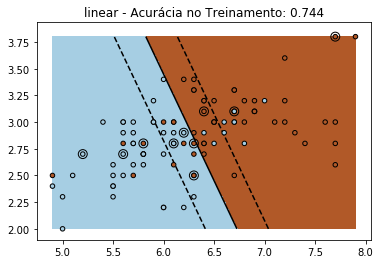

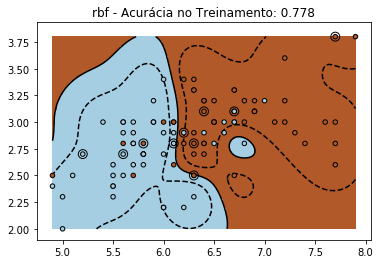

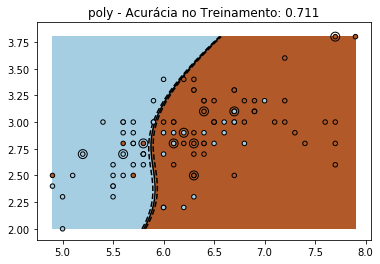

In [45]:
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Denotar com circulo o test set
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Colocar o resultado num plot colorido
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    # Gerar previsoes no Train Set
    y_pred = clf.predict(X_train)
    acc = round(accuracy_score(y_train, y_pred), 3)

    plt.title(kernel + f" - Acurácia no Treinamento: {acc}")
plt.show()